# EDA notebook

## Importing the Data

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import statistics as stat
import data_preparation as dp
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

bom_cleaned = pd.read_csv("../data/bom.movie_gross.csv.gz")
conn = sqlite3.connect("../data/im.db")

In [2]:
merged_financials = pd.read_csv("../data/merged_financials.csv")

In [3]:
imdb_basics = pd.read_csv("../data/imdb_basics_financials.csv")

## GENRE VS RATING

## GENRE VS GROSS

## GENRE VS GROSS & BUDGET

## BUDGET VS GROSS

In [6]:
imdb_basics

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,title_merge_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y
0,0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,NaN,NaN,NaN,NaN,NaN,NaN
1,1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",onedaybeforetherainyseason,NaN,NaN,NaN,NaN,NaN,NaN
2,2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,theothersideofthewind,NaN,NaN,NaN,NaN,NaN,NaN
3,3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",sabsebadasukh,NaN,NaN,NaN,NaN,NaN,NaN
4,4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",thewanderingsoapopera,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147924,147924,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama,kuambillagihatiku,NaN,NaN,NaN,NaN,NaN,NaN
147925,147925,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,rodolphoteóphiloolegadodeumpioneiro,NaN,NaN,NaN,NaN,NaN,NaN
147926,147926,tt9916706,Dankyavar Danka,2013,NaN,Comedy,dankyavardanka,NaN,NaN,NaN,NaN,NaN,NaN
147927,147927,tt9916730,6 Gunn,2017,116.0,NaN,6gunn,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
imdb_basics.drop('title_merge_x', axis = 1, inplace = True)

In [8]:
#making new table from imdb basics of only ones with a production budget
budget_vs_gross_df = imdb_basics[(imdb_basics['production_budget']!= 0) & (imdb_basics['production_budget'].notnull() == True)]

In [9]:
#making a net loss/gain col
budget_vs_gross_df['budget_vs_gross'] = budget_vs_gross_df['worldwide_gross'] - budget_vs_gross_df['production_budget']

<ipython-input-9-31a355427558>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_vs_gross_df['budget_vs_gross'] = budget_vs_gross_df['worldwide_gross'] - budget_vs_gross_df['production_budget']


In [10]:
budget_vs_gross_df

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross
20,20,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",2012-12-31 00:00:00,Foodfight!,45000000.0,0.0,73706.0,foodfight!,-44926294.0
33,33,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",1995-08-18 00:00:00,Mortal Kombat,20000000.0,70433227.0,122133227.0,mortalkombat,102133227.0
40,40,tt0326592,The Overnight,2010,88.0,NaN,2015-06-19 00:00:00,The Overnight,200000.0,1109808.0,1165996.0,theovernight,965996.0
49,49,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",2013-03-22 00:00:00,On the Road,25000000.0,720828.0,9313302.0,ontheroad,-15686698.0
56,56,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",2013-12-25 00:00:00,The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,thesecretlifeofwaltermitty,96861183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147627,147627,tt9877596,Trapped,2016,NaN,NaN,2002-09-20 00:00:00,Trapped,30000000.0,6916869.0,6916869.0,trapped,-23083131.0
147721,147721,tt9889072,The Promise,2017,NaN,Drama,2017-04-21 00:00:00,The Promise,90000000.0,8224288.0,10551417.0,thepromise,-79448583.0
147770,147770,tt9893078,Sublime,2019,NaN,Documentary,2007-03-13 00:00:00,Sublime,1800000.0,0.0,0.0,sublime,-1800000.0
147809,147809,tt9899880,Columbus,2018,85.0,Comedy,2017-08-04 00:00:00,Columbus,700000.0,1017107.0,1110511.0,columbus,410511.0


In [11]:
prod_median = budget_vs_gross_df['production_budget'].median()
prod_median

16000000.0

In [12]:
prod_std = budget_vs_gross_df['production_budget'].std()
prod_std
prod_mean = budget_vs_gross_df['production_budget'].mean()
prod_mean

32608184.522411533

In [13]:
high_end = prod_std + prod_mean
high_end

77567348.58457226

In [14]:
low_end = prod_mean-prod_std
low_end
#unusable, maybe use median as low end?

-12350979.539749198

Copied from below
- mean is 32m
- std is 45m
- going below yeilds negative production budget. makes no sense
- median is 16m. half of mean.
- maybe use 16m as low end
- use mean + 1 std as high end?
    - not sure if statisically this is a correct thing to do

F:\Anaconda\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


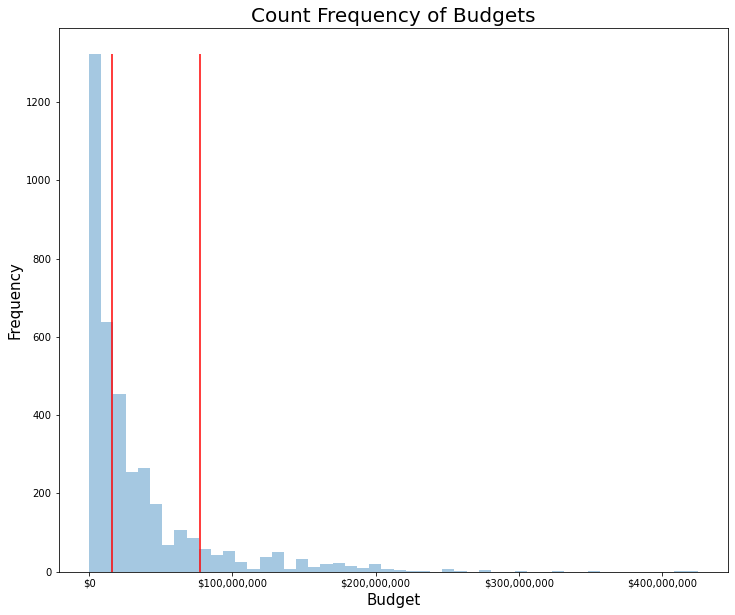

In [15]:
#making a bar chart to check for skewedness
fig, ax = plt.subplots(figsize=(12,10))

sns.distplot(x = budget_vs_gross_df['production_budget'], hist=True, kde=False, rug=False)
ax.set_title('Count Frequency of Budgets', size = 20)
ax.set_xlabel('Budget', size = 15)
ax.set_ylabel('Frequency', size = 15)

#theoretically where mid, low, and high end budgets would fall
#reasoning for using these metrics above
ax.vlines(x = high_end, ymin = 0, ymax = 1321,
         color = 'red')

ax.vlines(x = prod_median, ymin = 0, ymax = 1321,
         color = 'red')


ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
#ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

Yup, this is skewed lol

In [16]:
high_budget_success = budget_vs_gross_df[(budget_vs_gross_df['budget_vs_gross'] > 0) & 
                                 (budget_vs_gross_df['production_budget'] > high_end)]
high_budget_failure = budget_vs_gross_df[(budget_vs_gross_df['budget_vs_gross'] < 0) & 
                                 (budget_vs_gross_df['production_budget'] > high_end)]

#above 77.5m, high end. done by using 1std away (i know not normal, attemped clt below but dont have the confidence to use in case it was done incorrectly)


mid_budget_success = budget_vs_gross_df[(budget_vs_gross_df['budget_vs_gross'] > 0) & 
                                 (budget_vs_gross_df['production_budget'] <= high_end) &
                                         (budget_vs_gross_df['production_budget']>prod_median)]
mid_budget_failure = budget_vs_gross_df[(budget_vs_gross_df['budget_vs_gross'] < 0) & 
                                 (budget_vs_gross_df['production_budget'] <= high_end) &
                                         (budget_vs_gross_df['production_budget']>prod_median)]

#between 77.5m and 16m. low end determined by median, middle amount of films.

low_budget_success = budget_vs_gross_df[(budget_vs_gross_df['budget_vs_gross'] > 0) & 
                                 (budget_vs_gross_df['production_budget'] <= prod_median)]
low_budget_failure = budget_vs_gross_df[(budget_vs_gross_df['budget_vs_gross'] < 0) & 
                                 (budget_vs_gross_df['production_budget'] <= prod_median)]

In [17]:
high_success = len(high_budget_success)
high_failure = len(high_budget_failure)
mid_success = len(mid_budget_success)
mid_failure = len(mid_budget_failure)
low_success = len(low_budget_success)
low_failure = len(low_budget_failure)
print(low_failure)


1006


In [18]:
percent_high_failure = high_failure / (high_failure + high_success) * 100
percent_mid_failure = mid_failure / (mid_failure + mid_success) * 100
percent_low_failure = low_failure / (low_failure + low_success) * 100

In [19]:
print(f"Percentage of high budget films who profited: {(100 - percent_high_failure):.2f}")
print(f"Percentage of middle budget films who profited: {(100 - percent_mid_failure):.2f}")
print(f"Percentage of low budget films who profited: {(100 - percent_low_failure):.2f}")
print(f"********************************************************")

print(f"Amount of high budget films from total population: {high_success + high_failure:.0f}")
print(f"Amount of middle budget films from total population: {mid_success + mid_failure:.0f}")
print(f"Amount of low budget films from total population: {low_failure + low_success:.0f}")

Percentage of high budget films who profited: 88.58
Percentage of middle budget films who profited: 65.07
Percentage of low budget films who profited: 47.98
********************************************************
Amount of high budget films from total population: 438
Amount of middle budget films from total population: 1443
Amount of low budget films from total population: 1934


As suspected, data is skewed, but it may reflect real life standards. Makes more sense more low budget films are made than middle, and so on with high end budget

In [20]:
percent_high_failure

11.415525114155251

In [21]:
percent_mid_failure

34.92723492723493

In [22]:
percent_low_failure

52.01654601861427

Below is an attempt at CLT

In [23]:
#make a list from prod budget to get means
budget_list = budget_vs_gross_df['production_budget']
budget_list = budget_list.reset_index()

budget_list.drop(['index'], axis = 1, inplace = True)


In [24]:
number = float(budget_list.iloc[900])
number
#testing if locating by ind works


75000000.0

In [25]:
len(budget_vs_gross_df.index)

3815

I believe the below is CLT, sample size of 300, 700 sample plots? Did not use these metrics because I was not sure if this was done correctly

In [125]:
#mean points to plot
sample_mean_list = []
#gathering sample to get mean of
mean_in_loop = []


max_sample = 300

max_random = len(budget_vs_gross_df.index)

popu = 700

#Want x(700) samples to graph
for i in range(0,1 + popu):
#get mean of sample (300) random selections
    for j in range(0,max_sample + 1):
        #pick random index of sample
        random_pick = (np.random.randint(1,max_random) - 1)
        #append chosen production budget to mean_in_loop
        mean_in_loop.append(float(budget_list.iloc[random_pick]))
        #iterate loop
        j += 1
    #get mean of mean_in_loop, append to sample_mean_list to graph
    sample_mean_list.append(np.average(mean_in_loop))
    i += 1
    mean_in_loop = []
    #reset mean_in_loop to empty



F:\Anaconda\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


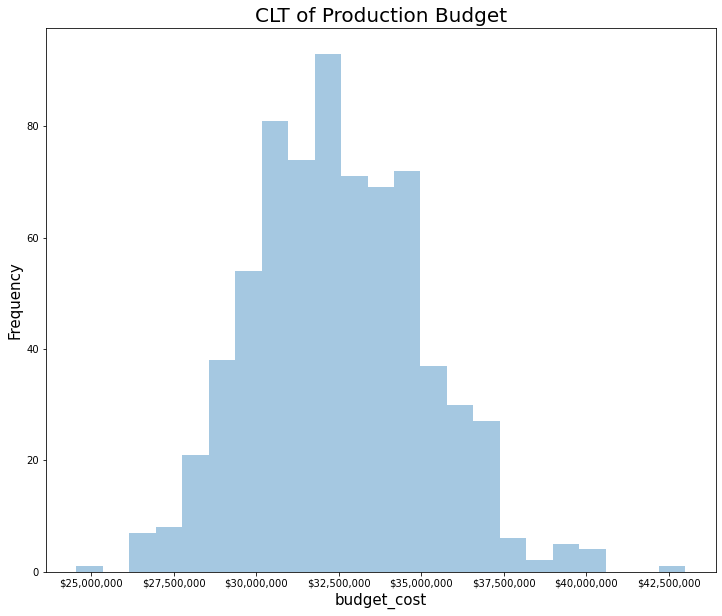

In [126]:
fig, ax = plt.subplots(figsize=(12,10))

sns.distplot(x = sample_mean_list, hist=True, kde=False, rug=False)
ax.set_title('CLT of Production Budget', size = 20)
ax.set_xlabel('budget_cost', size = 15)
ax.set_ylabel('Frequency', size = 15)
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
#ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

In [127]:
average = sum(sample_mean_list)/len(sample_mean_list)
average

32503853.847550478

In [128]:
stand = stat.stdev(sample_mean_list)
stand

2589298.8821432856

In [129]:
average + 3*stand

40271750.49398033

 ??? This is supposed to mean 3 std away, 97.5% of data is below  $40,271,750??

In [130]:
lol_no_shot = average + 3*stand

In [131]:
nah = budget_vs_gross_df[budget_vs_gross_df['production_budget'] > lol_no_shot]
print(len(budget_vs_gross_df))
print(len(nah))

3815
902


After a quick check, this CLT was coded incorrectly or not being used correctly.

If you run again and get to this point with different numbers, its because the CLT function ran again and got a new sample pool to look at. But results were consistently close with multiple runs

Ignoring CLT metrics, using metrics above CLT, below is graph sectioned off by budget tier using metrics above CLT attempt.

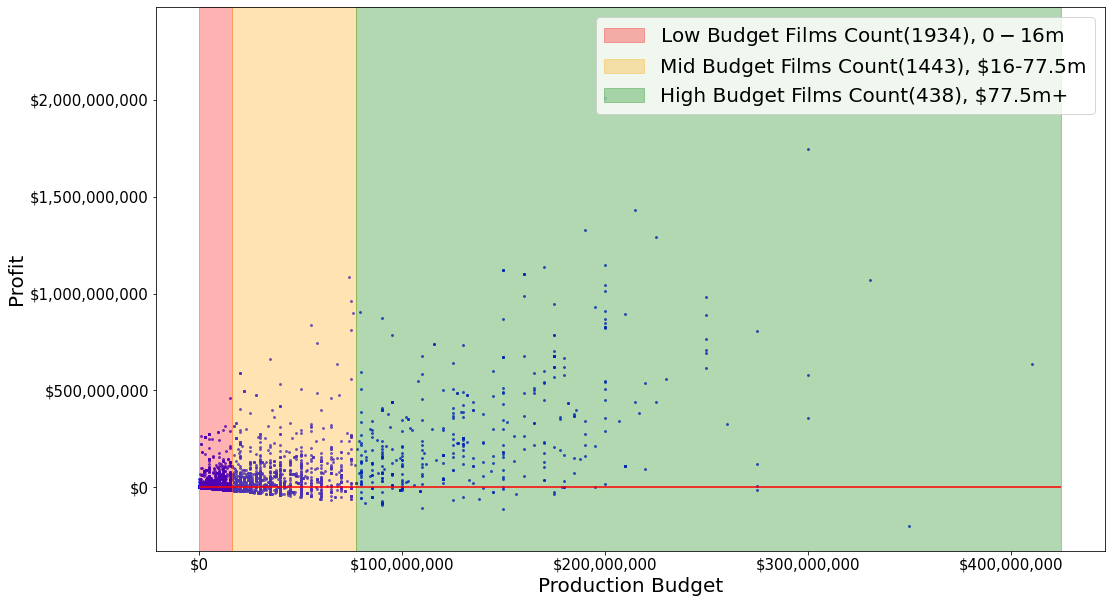

In [132]:
fig, ax = plt.subplots(figsize=(17,10))
sns.regplot(x = budget_vs_gross_df['production_budget'], y = budget_vs_gross_df['budget_vs_gross'], marker = '.', 
            scatter_kws={"color":"blue","alpha":0.7,"s":15}, fit_reg = False)

#ax.set_title('Production Budget vs Profit', size = 20)
ax.set_xlabel('Production Budget', size = 20)
ax.set_ylabel('Profit', size = 20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#ax.vlines(x = high_end, ymin = budget_vs_gross_df['budget_vs_gross'].min(), ymax = budget_vs_gross_df['budget_vs_gross'].max(),
#         color = 'red')

#ax.vlines(x = prod_median, ymin = budget_vs_gross_df['budget_vs_gross'].min(), ymax = budget_vs_gross_df['budget_vs_gross'].max(),
#         color = 'red')


ax.axvspan(0, prod_median, alpha=0.3, color='red')

ax.axvspan(prod_median, high_end, alpha=0.3, color='orange')

ax.axvspan(high_end, budget_vs_gross_df['production_budget'].max(), alpha=0.3, color='green')

legend_drawn_flag = True

plt.legend(["Low Budget Films Count(1934), $0 - $16m", "Mid Budget Films Count(1443), $16-77.5m", "High Budget Films Count(438), $77.5m+"], loc = "upper right", fontsize= 20)





ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.hlines(y = 0, xmin = budget_vs_gross_df['production_budget'].min(), xmax = budget_vs_gross_df['production_budget'].max(),
         color = 'red')
plt.savefig('budget_profit.png')

Below was for checking out graph without outliers

In [35]:
net_positive = budget_vs_gross_df[budget_vs_gross_df['budget_vs_gross'] > 0]
net_negative = budget_vs_gross_df[budget_vs_gross_df['budget_vs_gross'] < 0]

In [36]:
chance_of_loss = len(net_negative)/len(budget_vs_gross_df) * 100
chance_of_loss

40.89121887287025

In [37]:
production_mean = budget_vs_gross_df['production_budget'].mean()
production_mean

32608184.522411533

In [38]:
production_std = budget_vs_gross_df['production_budget'].std()
production_std

44959164.06216073

- will take values 2 std away from mean (from 0 - 95% of data)

In [39]:
production_max = production_mean + (2*production_std)
production_max

122526512.64673299

In [40]:
std2_away = budget_vs_gross_df[budget_vs_gross_df['production_budget'] < production_max]
std2_away

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross
20,20,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",2012-12-31 00:00:00,Foodfight!,45000000.0,0.0,73706.0,foodfight!,-44926294.0
33,33,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",1995-08-18 00:00:00,Mortal Kombat,20000000.0,70433227.0,122133227.0,mortalkombat,102133227.0
40,40,tt0326592,The Overnight,2010,88.0,NaN,2015-06-19 00:00:00,The Overnight,200000.0,1109808.0,1165996.0,theovernight,965996.0
49,49,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",2013-03-22 00:00:00,On the Road,25000000.0,720828.0,9313302.0,ontheroad,-15686698.0
56,56,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",2013-12-25 00:00:00,The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,thesecretlifeofwaltermitty,96861183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147627,147627,tt9877596,Trapped,2016,NaN,NaN,2002-09-20 00:00:00,Trapped,30000000.0,6916869.0,6916869.0,trapped,-23083131.0
147721,147721,tt9889072,The Promise,2017,NaN,Drama,2017-04-21 00:00:00,The Promise,90000000.0,8224288.0,10551417.0,thepromise,-79448583.0
147770,147770,tt9893078,Sublime,2019,NaN,Documentary,2007-03-13 00:00:00,Sublime,1800000.0,0.0,0.0,sublime,-1800000.0
147809,147809,tt9899880,Columbus,2018,85.0,Comedy,2017-08-04 00:00:00,Columbus,700000.0,1017107.0,1110511.0,columbus,410511.0


In [41]:
std2_away_above = budget_vs_gross_df[budget_vs_gross_df['production_budget'] > production_max]

In [42]:
std2_away_above

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross
64,64,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",2015-06-12 00:00:00,Jurassic World,215000000.0,652270625.0,1.648855e+09,jurassicworld,1.433855e+09
78,78,tt0398286,Tangled,2010,100.0,"Adventure,Animation,Comedy",2010-11-24 00:00:00,Tangled,260000000.0,200821936.0,5.864772e+08,tangled,3.264772e+08
81,81,tt0401729,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",2012-03-09 00:00:00,John Carter,275000000.0,73058679.0,2.827781e+08,johncarter,7.778100e+06
118,118,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",2010-06-18 00:00:00,Toy Story 3,200000000.0,415004880.0,1.068880e+09,toystory3,8.688795e+08
121,121,tt0437086,Alita: Battle Angel,2019,122.0,"Action,Adventure,Sci-Fi",2019-02-14 00:00:00,Alita: Battle Angel,170000000.0,85710210.0,4.029760e+08,alitabattleangel,2.329760e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141066,141066,tt9001554,Dinosaur,2018,5.0,"Animation,Documentary,Family",2000-05-19 00:00:00,Dinosaur,127500000.0,137748063.0,3.561481e+08,dinosaur,2.286481e+08
142753,142753,tt9173998,Beauty and the Beast,2018,60.0,"Family,Fantasy,Musical",2017-03-17 00:00:00,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,beautyandthebeast,1.099200e+09
143544,143544,tt9281490,Home,2018,50.0,Documentary,2015-03-27 00:00:00,Home,130000000.0,177397510.0,3.859979e+08,home,2.559979e+08
146470,146470,tt9698912,Aladdin,2017,NaN,Fantasy,2019-05-24 00:00:00,Aladdin,182000000.0,246734314.0,6.192343e+08,aladdin,4.372343e+08


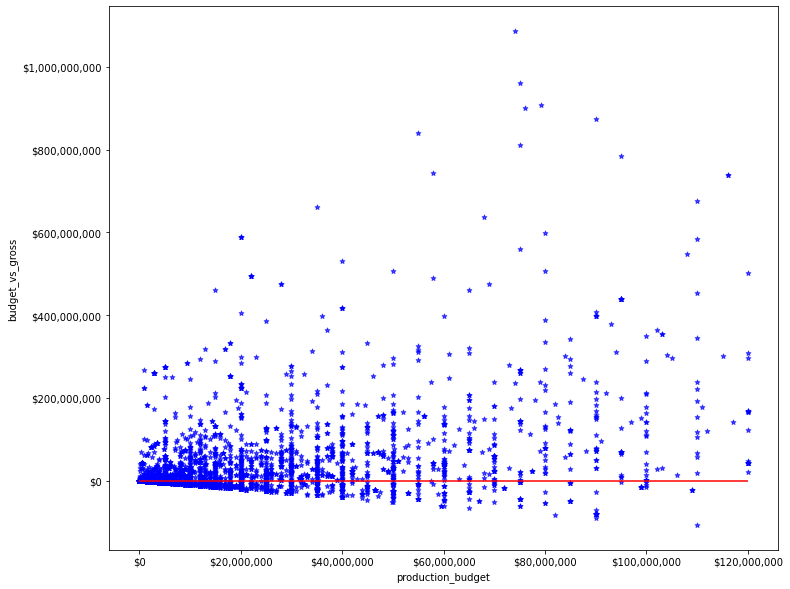

In [43]:
#redoing plot to remove outliers
fig, ax = plt.subplots(figsize=(12,10))
sns.regplot(x = std2_away['production_budget'], y = std2_away['budget_vs_gross'], marker = '*', 
            scatter_kws={"color":"blue","alpha":0.7,"s":25}, fit_reg = False)
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.hlines(y = 0, xmin = std2_away['production_budget'].min(), xmax = std2_away['production_budget'].max(),
         color = 'red')

- LEGACY CONCLUSION, USING LOGIC ABOVE IN PRESENTATION
- I think the only conclusion with the chance of loss is
   - if you spend less than 123,000, you have a 43% are unprofitable
   - if you spend more, the profitable are now about 40%
- this conclusion is pretty weak imo. But separating into 2 dfs of net loss and net gain may help in the next EDA's
- Will continue with the net_pos/net_neg withouth the 2std calculation (this was a lie, but a thought initially)

## WRITER VS GROSS

This metric was abandoned because of low belief in accuracy and time constraints

In [44]:
q0 = """
SELECT DISTINCT *
FROM movie_basics
;
"""
imdb_basics_true = pd.read_sql(q0, conn)

In [45]:
q0 = """
SELECT DISTINCT *
FROM writers
;
"""
writer_df = pd.read_sql(q0, conn)

In [46]:
q1 = """
SELECT DISTINCT person_id, primary_name, death_year
FROM persons
;
"""
person_df = pd.read_sql(q1, conn)

In [47]:
writer_df = writer_df.merge(
    person_df, 
    left_on='person_id',
    right_on = 'person_id',
    how = 'left')

In [48]:
writer_df.duplicated().value_counts()

False    178352
dtype: int64

In [49]:
#####

In [50]:
q3 = """
SELECT DISTINCT movie_id, region, types
FROM movie_akas
;
"""
movie_akas_df = pd.read_sql(q3, conn)

In [51]:
movie_akas_df

,movie_id,region,types
0,tt0369610,BG,None
1,tt0369610,JP,imdbDisplay
2,tt0369610,BR,imdbDisplay
3,tt0369610,BR,None
4,tt0369610,FR,imdbDisplay
...,...,...,...
322199,tt9827784,None,original
322200,tt9827784,XWW,imdbDisplay
322201,tt9880178,None,original
322202,tt9880178,ES,None


In [52]:
imdb_basics_true = imdb_basics_true.merge(
    movie_akas_df, 
    left_on='movie_id',
    right_on = 'movie_id',
    how = 'left')
#adding akas to movie_basics

In [53]:
imdb_basics_true = imdb_basics_true[(imdb_basics_true['region'] == 'US')]
#Want only US based movies

In [54]:
imdb_basics_true

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,region,types
11,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,US,imdbDisplay
26,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",US,None
46,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,US,None
57,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,US,imdbDisplay
59,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,US,None
...,...,...,...,...,...,...,...,...
345307,tt9837530,Monkey King Reloaded,Monkey King Reloaded,2017,77.0,Adventure,US,None
345405,tt9845398,End of the Century,Fin de siglo,2019,84.0,Drama,US,imdbDisplay
345662,tt9875852,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",US,imdbDisplay
345740,tt9882084,Chasing Happiness,Chasing Happiness,2019,96.0,Documentary,US,imdbDisplay


In [55]:
imdb_basics_true['title_merge'] = imdb_basics_true['primary_title'].apply(str.lower)

imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace(':', '')
imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace(' ', '')
imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace(',', '')
imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace('-', '')
imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace('.', '')
imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace('partiii', 'part3')
imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace('partii', 'part2')
imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace('parti', 'part1')

In [56]:
imdb_basics_merged = imdb_basics_true.merge(
    merged_financials, 
    left_on='title_merge',
    right_on = 'title_merge',
    how = 'left')
#merge financials and imdb

In [57]:
imdb_basics_merged = imdb_basics_merged[(imdb_basics_merged['production_budget']!= 0) & (imdb_basics_merged['production_budget'].notnull() == True)]
#dont want null prod_budget, if null then there is no info on finances. Also 0 prod budget means we got no info on it

In [59]:
imdb_basics_merged.duplicated().value_counts()

False    2857
dtype: int64

In [142]:
imdb_basics_merged_writer = writer_df.merge(
    imdb_basics_merged,
    left_on = 'movie_id',
    right_on = 'movie_id',
    how = 'left')

In [143]:
imdb_basics_merged_writer.duplicated().value_counts()

False    179995
dtype: int64

In [144]:
imdb_basics_merged_writer = imdb_basics_merged_writer[
    (imdb_basics_merged_writer['production_budget'] !=0) &
    (imdb_basics_merged_writer['production_budget'].notnull() == True)]

In [145]:
imdb_basics_merged_writer['net_profit'] = imdb_basics_merged_writer['worldwide_gross'] - imdb_basics_merged_writer['production_budget']

In [146]:
mean_writer_profit = imdb_basics_merged_writer.groupby('primary_name').mean().sort_values(by = 'net_profit', ascending = False)

In [147]:
imdb_basics_merged_writer.groupby('primary_name').count().sort_values(by = 'movie_id', ascending = False)
#this is just testing if i didnt mess up the amount of writers

,movie_id,person_id,death_year,primary_title,original_title,start_year,runtime_minutes,genres,region,types,title_merge,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
primary_name,,,,,,,,,,,,,,,,,,
Jack Kirby,39,39,39,39,39,39,39,39,39,20,39,39,39,39,39,39,39,39
Stan Lee,36,36,36,36,36,36,36,36,36,17,36,36,36,36,36,36,36,36
Nicholas Stoller,15,15,0,15,15,15,15,15,15,6,15,15,15,15,15,15,15,15
Larry Lieber,14,14,0,14,14,14,14,14,14,6,14,14,14,14,14,14,14,14
Eric Heisserer,13,13,0,13,13,13,13,13,13,9,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
James Thurber,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Jamie Buckner,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Jamie Grefe,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1


In [148]:
mean_writer_profit = mean_writer_profit[mean_writer_profit['death_year'].isnull()]
#dont want the dead

In [149]:
mean_writer_tograph = mean_writer_profit.head(10)

In [150]:
mean_writer_tograph

,death_year,start_year,runtime_minutes,Unnamed: 0,production_budget,domestic_gross,worldwide_gross,net_profit
primary_name,,,,,,,,
Colin Trevorrow,NaN,2016.000000,125.333333,3446.333333,2.000000e+08,5.740870e+08,1.534494e+09,1.334494e+09
Joe Robert Cole,NaN,2018.000000,134.000000,3428.000000,2.000000e+08,7.000596e+08,1.348258e+09,1.148258e+09
Adam Green,NaN,2010.000000,93.000000,3542.000000,1.500000e+08,4.007380e+08,1.272470e+09,1.122470e+09
Chris Buck,NaN,2013.000000,102.000000,3542.000000,1.500000e+08,4.007380e+08,1.272470e+09,1.122470e+09
Shane Morris,NaN,2013.000000,102.000000,3542.000000,1.500000e+08,4.007380e+08,1.272470e+09,1.122470e+09
Jim Starlin,NaN,2015.800000,137.600000,3421.600000,2.662400e+08,4.639625e+08,1.297469e+09,1.031229e+09
Adi Granov,NaN,2013.000000,130.000000,3434.000000,2.000000e+08,4.089923e+08,1.215392e+09,1.015392e+09
Steve Gan,NaN,2016.333333,135.333333,3442.666667,2.233333e+08,4.672669e+08,1.227106e+09,1.003773e+09
Keith Giffen,NaN,2016.333333,135.333333,3442.666667,2.233333e+08,4.672669e+08,1.227106e+09,1.003773e+09


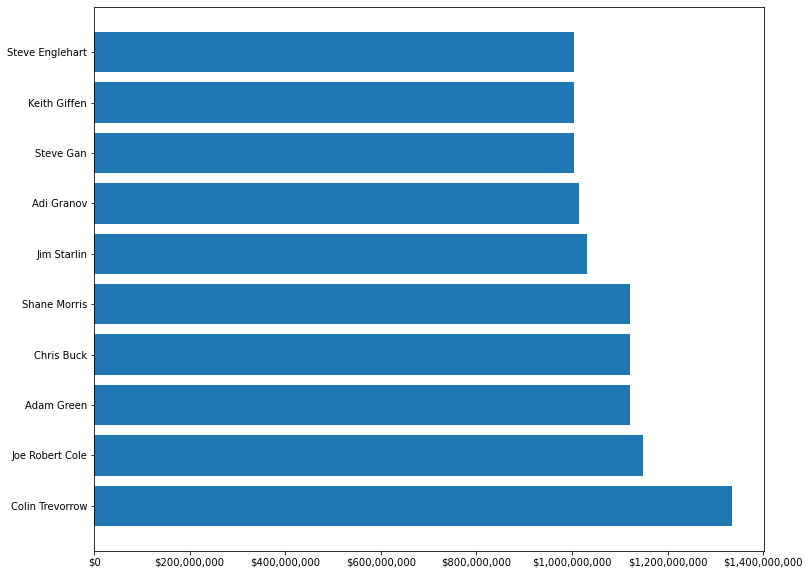

In [151]:
fig, ax = plt.subplots(figsize=(12,10))

ax.barh(mean_writer_tograph.index, mean_writer_tograph['net_profit'])
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

## DIRECTOR VS GROSS OR RATING

In [72]:
q2 = """
SELECT DISTINCT *
FROM directors
;
"""
director_df = pd.read_sql(q2, conn)

In [73]:
director_df = director_df.merge(
    person_df, 
    left_on='person_id',
    right_on = 'person_id',
    how = 'left')

In [74]:
director_df

,movie_id,person_id,primary_name,death_year
0,tt0285252,nm0899854,Tony Vitale,NaN
1,tt0462036,nm1940585,Bill Haley,NaN
2,tt0835418,nm0151540,Jay Chandrasekhar,NaN
3,tt0878654,nm0089502,Albert Pyun,NaN
4,tt0878654,nm2291498,Joe Baile,NaN
...,...,...,...,...
163530,tt8999974,nm10122357,Daysi Burbano,NaN
163531,tt9001390,nm6711477,Bernard Lessa,NaN
163532,tt9001494,nm10123242,Tate Nova,NaN
163533,tt9001494,nm10123248,Courtney Faye Powell,NaN


In [75]:
imdb_basics_merged_dir = director_df.merge(
    imdb_basics_merged,
    left_on = 'movie_id',
    right_on = 'movie_id',
    how = 'left')

In [76]:
imdb_basics_merged_dir = imdb_basics_merged_dir[(imdb_basics_merged_dir['production_budget'].notnull() == True)]
#nulls dont have financial info

In [77]:
imdb_basics_merged_dir

,movie_id,person_id,primary_name,death_year,primary_title,original_title,start_year,runtime_minutes,genres,region,types,title_merge,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
8,tt0999913,nm0527109,Rod Lurie,NaN,Straw Dogs,Straw Dogs,2011.0,110.0,"Action,Drama,Thriller",US,imdbDisplay,strawdogs,5674.0,2011-09-16 00:00:00,Straw Dogs,25000000.0,10324441.0,11253821.0
49,tt1125929,nm0000431,Taylor Hackford,NaN,Love Ranch,Love Ranch,2010.0,117.0,"Biography,Comedy,Drama",US,None,loveranch,5705.0,2010-06-30 00:00:00,Love Ranch,25000000.0,137885.0,146149.0
50,tt1126618,nm0585011,Roger Michell,NaN,Morning Glory,Morning Glory,2010.0,107.0,"Comedy,Drama,Romance",US,None,morningglory,4859.0,2010-11-10 00:00:00,Morning Glory,40000000.0,31011732.0,59795070.0
52,tt1152830,nm1864022,Chris Tyrrell,NaN,The Joneses,The Joneses,2011.0,117.0,"Comedy,Drama",US,None,thejoneses,7074.0,2010-04-16 00:00:00,The Joneses,10000000.0,1475746.0,3541565.0
64,tt1336608,nm0788202,Adam Shankman,NaN,Rock of Ages,Rock of Ages,2012.0,123.0,"Comedy,Drama,Musical",US,None,rockofages,4115.0,2012-06-15 00:00:00,Rock of Ages,70000000.0,38518613.0,61031932.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163618,tt7368554,nm0838499,Martin Sulík,NaN,The Interpreter,The Interpreter,2018.0,113.0,"Comedy,Drama",US,imdbDisplay,theinterpreter,3849.0,2005-04-22 00:00:00,The Interpreter,90000000.0,72708161.0,162753837.0
163747,tt7594192,nm9267400,Jehan Semper,NaN,Beautiful,Beautiful,2019.0,NaN,Drama,US,None,beautiful,7187.0,2000-09-29 00:00:00,Beautiful,9000000.0,3134509.0,3134509.0
163764,tt7634968,nm0788202,Adam Shankman,NaN,What Men Want,What Men Want,2019.0,117.0,"Comedy,Fantasy,Romance",US,None,whatmenwant,5907.0,2019-02-08 00:00:00,What Men Want,20000000.0,54611903.0,69911903.0
163765,tt7634968,nm0788202,Adam Shankman,NaN,What Men Want,What Men Want,2019.0,117.0,"Comedy,Fantasy,Romance",US,imdbDisplay,whatmenwant,5907.0,2019-02-08 00:00:00,What Men Want,20000000.0,54611903.0,69911903.0


In [78]:
#creating net profit
imdb_basics_merged_dir['net_profit'] = imdb_basics_merged_dir['worldwide_gross'] - imdb_basics_merged_dir['production_budget']

In [79]:
#getting mean of dir
mean_dir_profit = imdb_basics_merged_dir.groupby('primary_name').mean().sort_values(by = 'net_profit', ascending = False)

In [80]:
#dont want the dead
mean_dir_profit = mean_dir_profit[mean_dir_profit['death_year'].isnull()]

In [135]:
mean_dir_profit.drop('Adam Green', axis = 0, inplace = True)
#false data, frozen got merged into him on accident.

In [136]:
#what to graph
mean_dir_tograph = mean_dir_profit.head(10)

In [137]:
#maybe?
mean_dir_tograph['net_profit']

primary_name
Chris Buck         1.122470e+09
Jennifer Lee       1.122470e+09
Kyle Balda         1.023032e+09
Eric Guillon       9.597278e+08
Colin Trevorrow    9.571273e+08
Joe Russo          9.234154e+08
Anthony Russo      9.234154e+08
Jared Bush         8.694296e+08
Pierre Coffin      8.549363e+08
Angus MacLane      8.212152e+08
Name: net_profit, dtype: float64

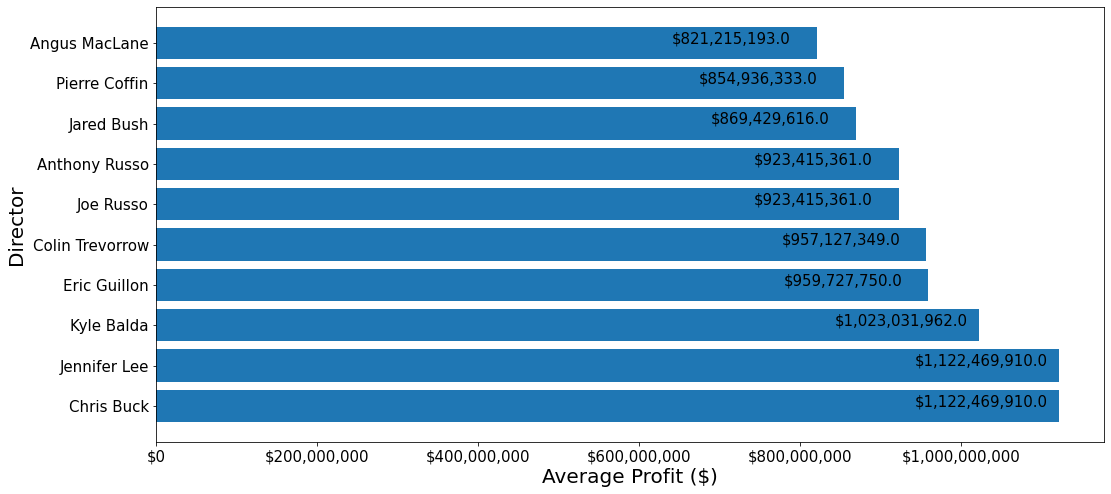

In [140]:
fig, ax = plt.subplots(figsize=(17,8))

director_ = mean_dir_tograph['net_profit']

ax.barh(director_.index, director_)
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

#ax.set_title('Director vs Average Profit', size = 20)
ax.set_xlabel('Average Profit ($)', size = 20)
ax.set_ylabel('Director', size = 20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for director in director_.index:
    ax.annotate(f"${format(round(director_[director], 0), ',')}", xy = (director_[director] - 180000000, director), size = 15)
    
plt.savefig('director_profit.jpg')

## RATED (R, M, PG, PG13) vs RATING (Popularity)

## RUNTIME VS GROSS/RATING (LOOK BY GENRE)

## RATING(pg,13, R) VS GROSS